## LOADING IN INFORMATION, INSTALLATIONS

In [3]:
!pip install sqlalchemy
!pip install pymysql

import sqlalchemy
import pymysql
from sqlalchemy import create_engine
import pandas as pd

In [4]:
password = 'InTheBl00d!!'
db_name = 'hotel_booking'

In [ ]:
# import os
# password = os.getenv("DB_PASSWORD")

In [5]:
conn = pymysql.connect(host='127.0.0.1', port=3306, user='root', password=password, database=db_name)

In [6]:
connection = create_engine("mysql+pymysql://root:" + password + "@localhost:3306/" + db_name)

In [30]:
reservations = pd.read_excel(r'C:\Users\llama\Downloads\Reservations.xlsx')

In [33]:
table_name = 'reservations'

In [34]:
reservations.to_sql(name=table_name, con=connection, if_exists='replace', index=False)

102

In [35]:
rooms = pd.read_excel(r'C:\Users\llama\Downloads\Rooms.xlsx')

In [36]:
table2_name = 'rooms'

In [37]:
rooms.to_sql(name=table2_name, con=connection, if_exists='replace', index=False)

50

In [32]:
guests = pd.read_excel(r'C:\Users\llama\Downloads\Guests1.xlsx')

In [33]:
table3_name = 'guests'

In [34]:
guests.to_sql(name=table3_name, con=connection, if_exists='replace', index=False)

101

In [6]:
payments = pd.read_excel(r'C:\Users\llama\Downloads\Payments1.xlsx')

In [7]:
table4_name = 'payments'

In [8]:
payments.to_sql(name=table4_name, con=connection, if_exists='replace', index=False)

102


## ALL PLATINUM GUESTS


In [40]:
query2 = """

SELECT First_name, Last_name FROM guests
WHERE Membership_Status ='Platinum'

"""
result_df_2 = pd.read_sql(query2, con=connection)
result_df_2

,First_name,Last_name
0,Robert,Logan
1,Ricky,Ellis
2,Antonio,Brown
3,Mitchell,Mendoza
4,Cory,Browning
5,Amy,Miller
6,Tiffany,Franklin
7,Michael,Jones
8,Travis,Williams
9,Kristin,Miles


## % of High Status Guests In Luxury Rooms 


In [19]:
query3 = """

SELECT 
  COUNT(DISTINCT Guests.Guest_ID) * 100.0 / 
  (SELECT COUNT(DISTINCT Guests.Guest_ID)
   FROM Guests
   JOIN Reservations ON Guests.Guest_ID = Reservations.guest_id
   WHERE Guests.Membership_Status = 'Platinum') 
  AS HighStatusUsers_in_luxury_room_percentage
FROM Guests
JOIN Reservations ON Guests.Guest_ID = Reservations.guest_id
JOIN Rooms ON Reservations.room_id = Rooms.room_id
WHERE Guests.Membership_Status IN ('Platinum', 'Gold', 'Silver')
  AND Rooms.room_type IN ('Presidential Suite', 'Penthouse', 'Executive Suite', 'Suite');
  """
result_df_3 = pd.read_sql(query3, con=connection)
result_df_3

,HighStatusUsers_in_luxury_room_percentage
0,80.64516


## Total Bookings per Room Type


In [12]:
query4 = """

SELECT room_type, COUNT(*) AS total_bookings
FROM Reservations 
JOIN Rooms ON Reservations.room_id = Rooms.room_id
GROUP BY room_type
ORDER BY total_bookings DESC;
  """
result_df_4 = pd.read_sql(query4, con=connection)
result_df_4

,room_type,total_bookings
0,Double,47
1,Single,26
2,Presidential Suite,13
3,Penthouse,12
4,Executive Suite,2
5,Suite,2


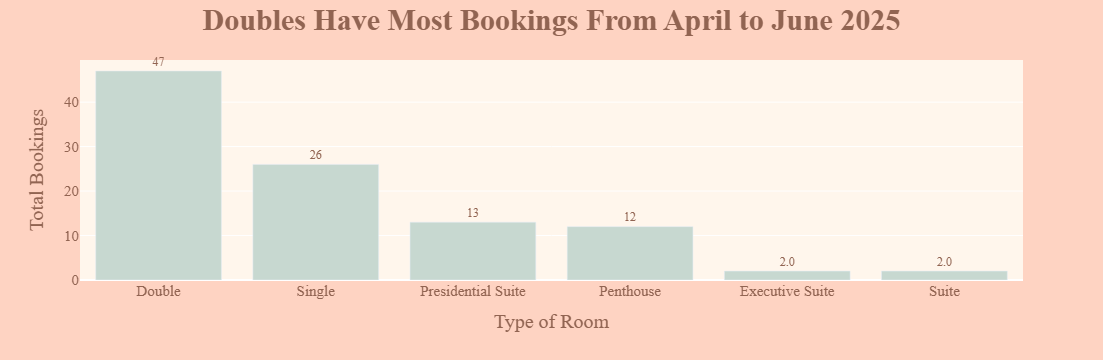

In [55]:
fig1 = px.bar(result_df_4, y='total_bookings', x = 'room_type', 
              labels={"room_type": "Type of Room", "total_bookings": "Total Bookings"}, text_auto='.2s', color_discrete_sequence=['#c7d8d0'])
fig1.update_layout(paper_bgcolor ='#fed3c2',
    plot_bgcolor= '#fff6ec',
    title_text = 'Doubles Have Most Bookings From April to June 2025',
                   title_x = 0.5,
                   title_font_weight = "bold",
                   title_font_family="Livvic",
                   title_font_color= '#916452',
                   title_font_size=30,
                    xaxis=dict(
                      titlefont=dict(
                      family="Livvic",
                      color='#916452',
                      size=20),
                        tickfont=dict(
                        family='Livvic',
                        color='#916452',
                        size=15)),
                    yaxis=dict(
                      titlefont=dict(
                        family="Livvic",
                        color='#916452',
                        size=20),
                        tickfont=dict(
                          family='Livvic',
                          color='#916452',
                          size=15)))

fig1.update_traces(textfont = dict(
    size = 12,
    family = 'Livvic',
    color = "#916452"),
    textposition="outside",
    cliponaxis=False)
fig1.show()

## Rooms currently in use, info abt cleanliness and maintenance 



In [47]:

##all rooms currently in use
query5 = """
SELECT number 
FROM Reservations
JOIN Rooms ON Reservations.room_id = Rooms.room_id
WHERE is_occupied = TRUE;
"""
result_df_5 = pd.read_sql(query5, con=connection)
result_df_5

,number
0,105
1,107
2,109
3,110
4,204
5,205
6,207
7,208
8,302
9,304


In [8]:
## num of occupied rooms in each floor 
query6 = """
SELECT 
    FLOOR(number / 100) AS floor,
    COUNT(*) AS num_rooms_occupied
FROM Reservations
JOIN Rooms ON Reservations.room_id = Rooms.room_id
WHERE is_occupied = TRUE
GROUP BY FLOOR(number / 100)
ORDER BY floor;
"""
result_df_6 = pd.read_sql(query6, con=connection)
result_df_6

,floor,num_rooms_occupied
0,1.0,4
1,2.0,4
2,3.0,7
3,4.0,4
4,5.0,3


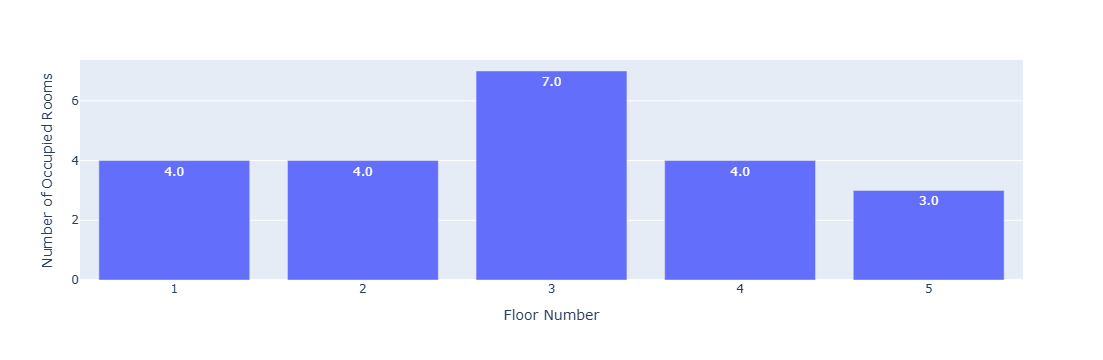

In [17]:
fig1 = px.bar(result_df_6, y='num_rooms_occupied', x = 'floor', 
              labels={"floor": "Floor Number", "num_rooms_occupied": "Number of Occupied Rooms"}, text_auto='.2s')
fig1.show()



In [51]:
query7 = """
SELECT membership_status, DATEDIFF(check_out_date, check_in_date) as num_total_stay
FROM Reservations
JOIN Guests ON Reservations.guest_id = Guests.Guest_ID
ORDER BY num_total_stay DESC;

"""
result_df_7 = pd.read_sql(query7, con=connection)
display(result_df_7)

query8 = """
SELECT membership_status, SUM(DATEDIFF(check_out_date, check_in_date)) as num_total_stay
FROM Reservations
JOIN Guests ON Reservations.guest_id = Guests.Guest_ID
GROUP BY membership_status
ORDER BY num_total_stay DESC;

"""

result_df_8 = pd.read_sql(query8, con=connection)
display(result_df_8)

,membership_status,num_total_stay
0,Silver,18
1,Platinum,10
2,Standard,8
3,Silver,7
4,Standard,6
...,...,...
96,Gold,2
97,Platinum,2
98,Gold,2
99,Platinum,1


,membership_status,num_total_stay
0,Silver,113.0
1,Platinum,102.0
2,Standard,84.0
3,Gold,36.0


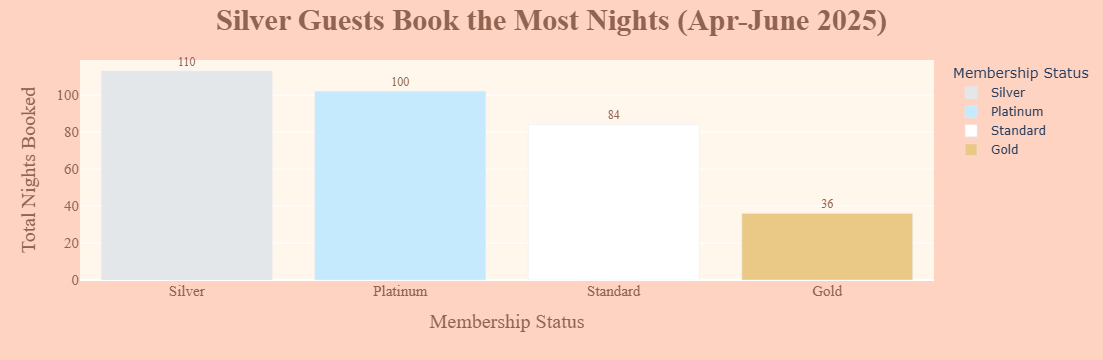

In [60]:
fig2 = px.bar(result_df_8, x='membership_status', y = 'num_total_stay', 
              labels={"membership_status": "Membership Status", "num_total_stay": "Total Nights Booked"}, text_auto='.2s',
              color='membership_status',  
             color_discrete_sequence=['#e3e7ea', '#c5eafe', 'white', '#eac987'])  

fig2.update_layout(paper_bgcolor ='#fed3c2',
    plot_bgcolor= '#fff6ec',
    title_text = 'Silver Guests Book the Most Nights (Apr-June 2025)',
                   title_x = 0.5,
                   title_font_weight = "bold",
                   title_font_family="Livvic",
                   title_font_color= '#916452',
                   title_font_size=30,
                    xaxis=dict(
                    
                      titlefont=dict(
                      family="Livvic",
                      color='#916452',
                      size=20),
                        tickfont=dict(
                        family='Livvic',
                        color='#916452',
                        size=15)),
                    yaxis=dict(
                      titlefont=dict(
                        family="Livvic",
                        color='#916452',
                        size=20),
                        tickfont=dict(
                          family='Livvic',
                          color='#916452',
                          size=15)))

fig2.update_traces(textfont = dict(
    size = 12,
    family = 'Livvic',
    color = "#916452"),
    textposition="outside",
    cliponaxis=False)
fig2.show()